In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
from numpy.linalg import inv
import statsmodels.api as sm
import pandas as pd
import re
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/Users/tiziana/Desktop/PYTHON/TESI MAGISTRALE/PCA/DATESET.csv')
df=df.iloc[:, 1:]
df.head()

,Gdp growth,Current Account,Public Debt,Country,Trimestre,Financial index
0,-0.281500,-0.285461,-1.210698,United States,2000Q1,-0.811926
1,0.064556,-0.264238,-1.330853,United States,2000Q2,-0.780101
2,-0.343394,-0.485583,-1.384746,United States,2000Q3,-0.839470
3,-0.225921,-0.503708,-1.416419,United States,2000Q4,-0.837575
4,-0.445356,-0.518578,-1.418319,United States,2001Q1,-0.885412


In [3]:
df.set_index(['Country'],inplace=True)
usa = pd.DataFrame(df.loc['United States'])

In [4]:
usa.reset_index(inplace=True)
usa=usa.drop(['Country','Trimestre'],axis=1)

In [5]:
dftest = adfuller(usa['Gdp growth'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print(f'Gdp growth is Stationary ')
else:
    print('Non stationary')



dftest = adfuller(usa['Current Account'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Current Account is Stationary')
else:
    print('Current Account Non stationary')


dftest = adfuller(usa['Public Debt'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Public Debt is Stationary')
else:
    print('Public Debt Non stationary')



dftest = adfuller(usa['Financial index'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Financial Index is Stationary')
else:
    print(f'Financial Index Non stationary')

Gdp growth is Stationary 
Current Account Non stationary
Public Debt Non stationary
Financial Index Non stationary


## COINTEGRATION TEST

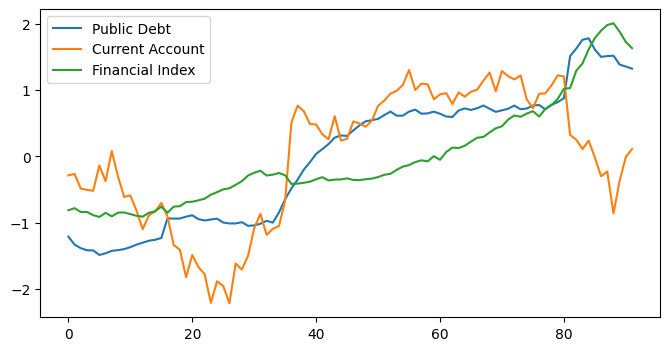

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 4))
plt.plot(usa['Public Debt'], label='Public Debt')
plt.plot(usa['Current Account'], label='Current Account')
plt.plot(usa['Financial index'], label='Financial Index')


plt.legend()
plt.show()

In [7]:
from statsmodels.tsa.api import VAR
model = VAR(usa)
lag_order = model.select_order(maxlags=8)  
lag_order.summary()


,AIC,BIC,FPE,HQIC
0,-5.106,-4.990,0.006059,-5.060
1,-15.51,-14.93*,1.844e-07,-15.27
2,-15.93,-14.89,1.207e-07,-15.51*
3,-15.96,-14.45,1.188e-07,-15.35
4,-16.08,-14.11,1.060e-07*,-15.29
5,-16.09,-13.66,1.077e-07,-15.11
6,-16.06,-13.17,1.143e-07,-14.90
7,-16.06,-12.70,1.193e-07,-14.71
8,-16.11*,-12.29,1.207e-07,-14.57


Nel caso del modelli in questione,basandosi sia su AIC sembra che 4 sia il numero maggiormente adatto di ritardi

In [8]:
usa_coin = usa.drop('Gdp growth',axis=1)
usa_coin

,Current Account,Public Debt,Financial index
0,-0.285461,-1.210698,-0.811926
1,-0.264238,-1.330853,-0.780101
2,-0.485583,-1.384746,-0.839470
3,-0.503708,-1.416419,-0.837575
4,-0.518578,-1.418319,-0.885412
...,...,...,...
87,-0.227344,1.515889,1.985438
88,-0.860360,1.521499,2.011519
89,-0.366785,1.388401,1.883995
90,-0.006635,1.357965,1.728261


In [9]:


from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
test = coint_johansen(usa_coin, det_order=1, k_ar_diff=5)

output = pd.DataFrame([test.lr1],  index=["trace_stat"], columns=['r=0', 'r<=1', 'r<=2'])
print(output.T, '\n')

cvt = pd.DataFrame(test.cvt, index=["r=0", "r<=1", "r<=2"], columns=["90%", "95%", "99%"])
print("Critical values(90%, 95%, 99%) of trace_stat\n", cvt, '\n')

print("Eigenvalues (lambda):\n")
print(test.eig, "\n")

print("Eigenvectors:")
evec = pd.DataFrame(test.evec).T
print(evec)


      trace_stat
r=0    22.652138
r<=1   11.097303
r<=2    4.434493 

Critical values(90%, 95%, 99%) of trace_stat
           90%      95%      99%
r=0   32.0645  35.0116  41.0815
r<=1  16.1619  18.3985  23.1485
r<=2   2.7055   3.8415   6.6349 

Eigenvalues (lambda):

[0.12572346 0.07454941 0.05025701] 

Eigenvectors:
          0         1         2
0  0.545688  3.675890  4.707582
1 -1.566688  4.104121 -2.378062
2  1.211392  0.249388 -1.175615


**Gia osservando il grafico si poteva intuire che nel caso USA non è che ci fosse questa grande similitudine tra le serie, ed il test di Jhoansen sembra confermarlo dato che di fatto ad un livello del 95% la statistica test non permette di rifiutare l'H0 di non cointegrazione**



## DIFFERENZA PRIMA DELLE SERIE COSI DA OTTENERE STAZIONARIETA

In [10]:
usa['Gdp growth']=usa['Gdp growth']
usa['Current Account'] = usa['Current Account'].diff(1)
usa['Public Debt'] = usa['Public Debt'].diff(1)
usa['Financial index'] = usa['Financial index'].diff(1)

usa=usa.iloc[1:]

In [11]:
dftest = adfuller(usa['Current Account'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Current Account is Stationary')
else:
    print('Current Account Non stationary')


dftest = adfuller(usa['Public Debt'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Public Debt is Stationary')
else:
    print('Public Debt Non stationary')



dftest = adfuller(usa['Financial index'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Financial Index is Stationary')
else:
    print('Financial Index Non stationary')


Current Account is Stationary
Public Debt is Stationary
Financial Index is Stationary


In [12]:
from statsmodels.tsa.api import VAR
model = VAR(usa)
lag_order = model.select_order(maxlags=8)  
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,-15.42,-15.31,2.005e-07,-15.38
1,-15.97,-15.39*,1.163e-07,-15.73*
2,-15.86,-14.81,1.296e-07,-15.44
3,-16.06,-14.54,1.073e-07,-15.45
4,-16.19*,-14.21,9.493e-08*,-15.40
5,-16.11,-13.66,1.054e-07,-15.13
6,-16.01,-13.09,1.206e-07,-14.84
7,-16.04,-12.66,1.218e-07,-14.69
8,-16.05,-12.20,1.289e-07,-14.50


## STRUCTURAL VAR AND COMPANION FORM

In [13]:
m = 4  #Considered Variable
p = 1 #Number of lags based on AIC criterion
c = 1  #Constant term
h = 15 #IRF horizon

T = len(usa)
Y = usa.iloc[p:, :] #Building a VAR(5) is not possible to consider first 5 observations

X_lagged  = pd.DataFrame()
for col in usa.columns:
    for i in range(1, p+1):
        X_lagged[f'{col}_lag_{i}'] = usa[col].shift(i)
X_lagged = X_lagged.iloc[p:,:]
X_lagged = X_lagged[[col for lag in sorted(set(int(re.search(r'_lag_(\d+)$', col).group(1)) 
                                               if re.search(r'_lag_(\d+)$', col) else 0 for col in X_lagged.columns)) 
                                               for col in [x for x in X_lagged.columns if re.search(fr'_lag_{lag}$', x)]] + 
                                               [x for x in X_lagged.columns if not re.search(r'_lag_\d+$', x)]]
X_lagged.insert(0, 'const', 1)

In [14]:
pi_hat = np.dot(np.dot(np.linalg.inv(np.dot(X_lagged.T, X_lagged)), X_lagged.T), Y) 
Y_fit = np.dot(X_lagged, pi_hat)
err = Y - Y_fit

A_comp = np.block([
[pi_hat[1:, :].T],
[np.eye(m * p - m), np.zeros((m * p - m, m))]
])

In [15]:
PHI = np.zeros((m, m, h))
for j in range(h):
    PHI_comp = np.linalg.matrix_power(A_comp, j)
    PHI[:, :, j] = PHI_comp[:m, :m]

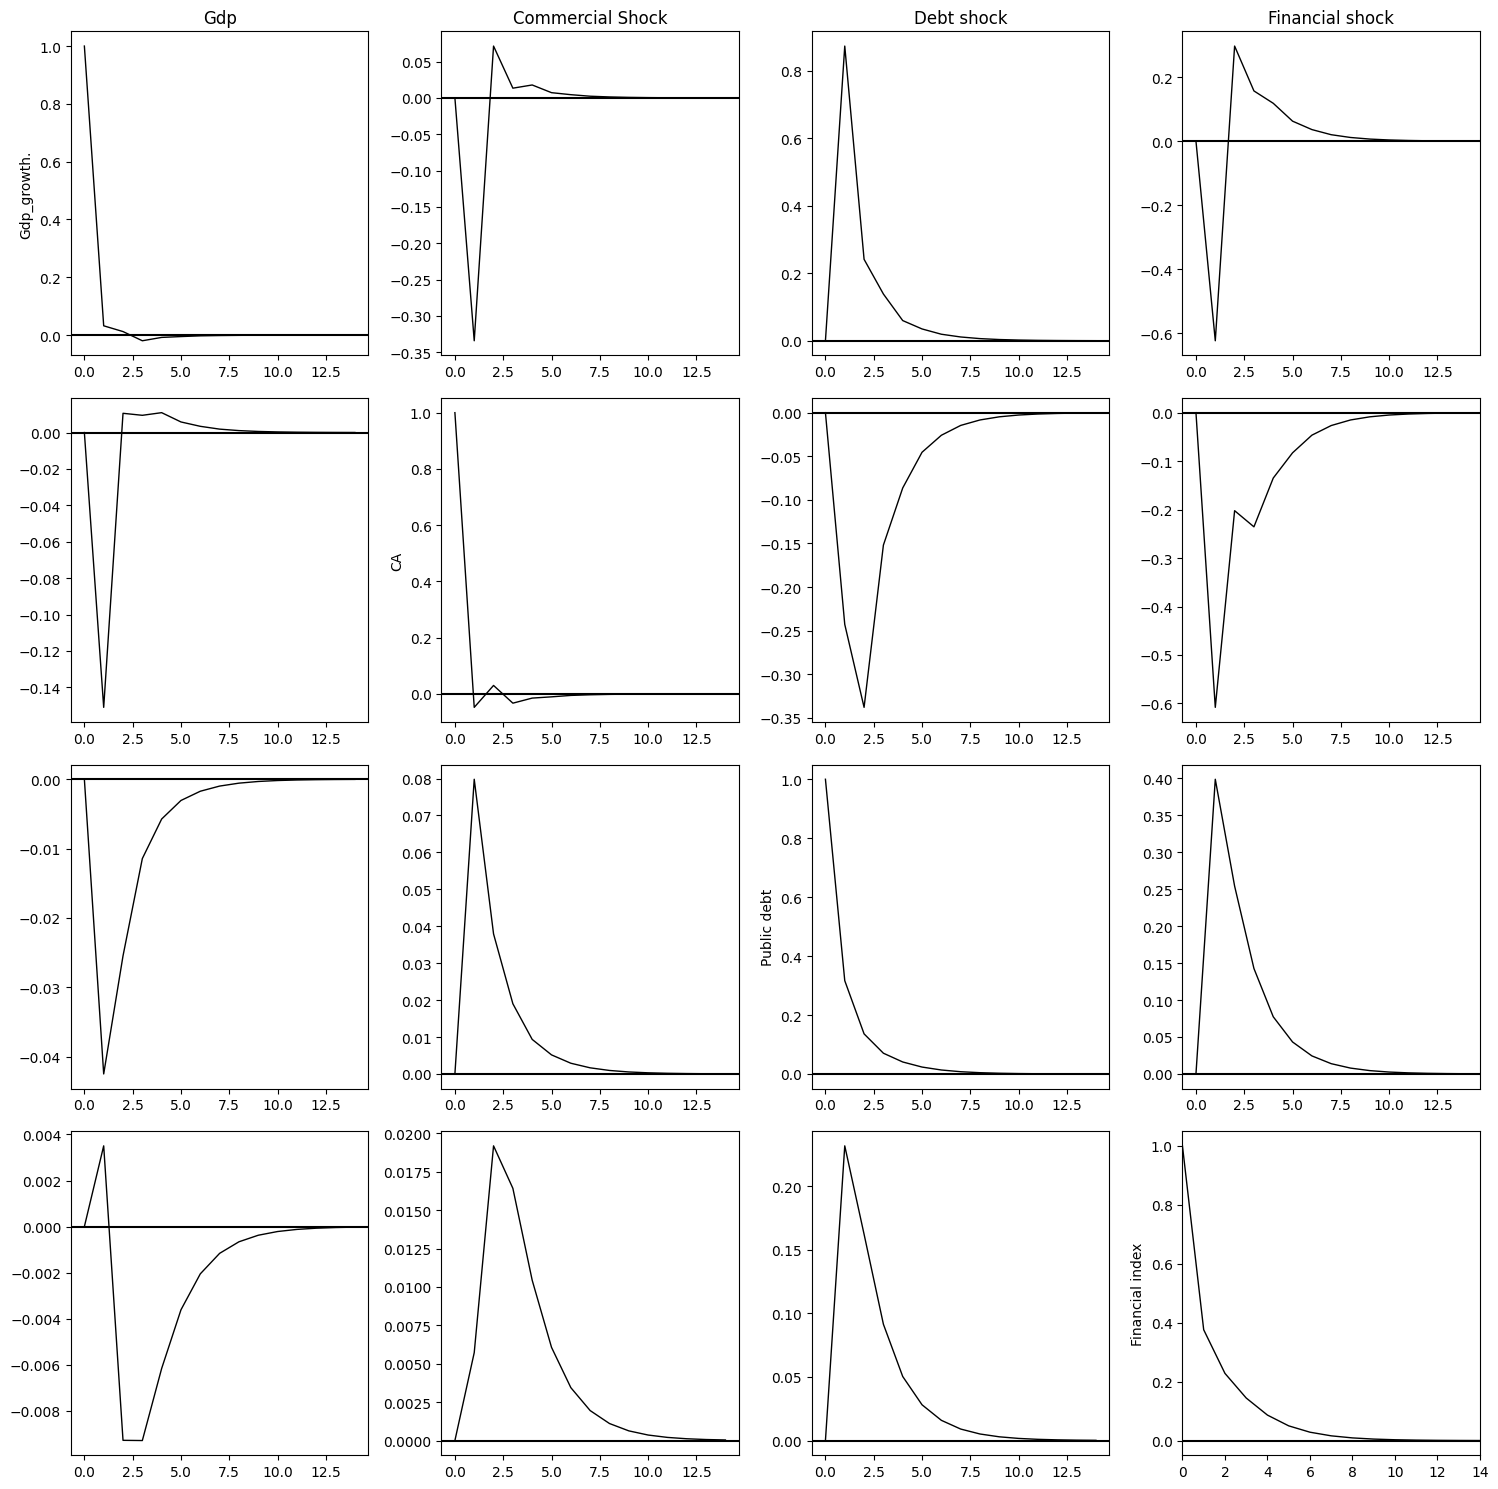

In [16]:

PHI_plot = np.reshape(np.transpose(PHI, (2, 0, 1)), (h, m*m))

VARnames = ['Gdp_growth.', 'CA', 'Public debt','Financial index']
Shocknames = ['Gdp', 'Commercial Shock', 'Debt shock','Financial shock']

ylab = 0

fig, axes = plt.subplots(m, m, figsize=(15, 15))
axes_flat = axes.flatten()
for k in range(m*m): 
    ax = axes_flat[k]
    ax.plot(np.arange(h), PHI_plot[:, k], linewidth=1, color='k')
    ax.axhline(0, color='k', linestyle='-')
    if k < 4: 
        ax.set_title(Shocknames[k]) 
    if k in [0, 5, 10,15]: 
        ax.set_ylabel(VARnames[ylab]) 
        ylab += 1
ax.set_xlim([0, h-1])
plt.tight_layout() 
plt.show()

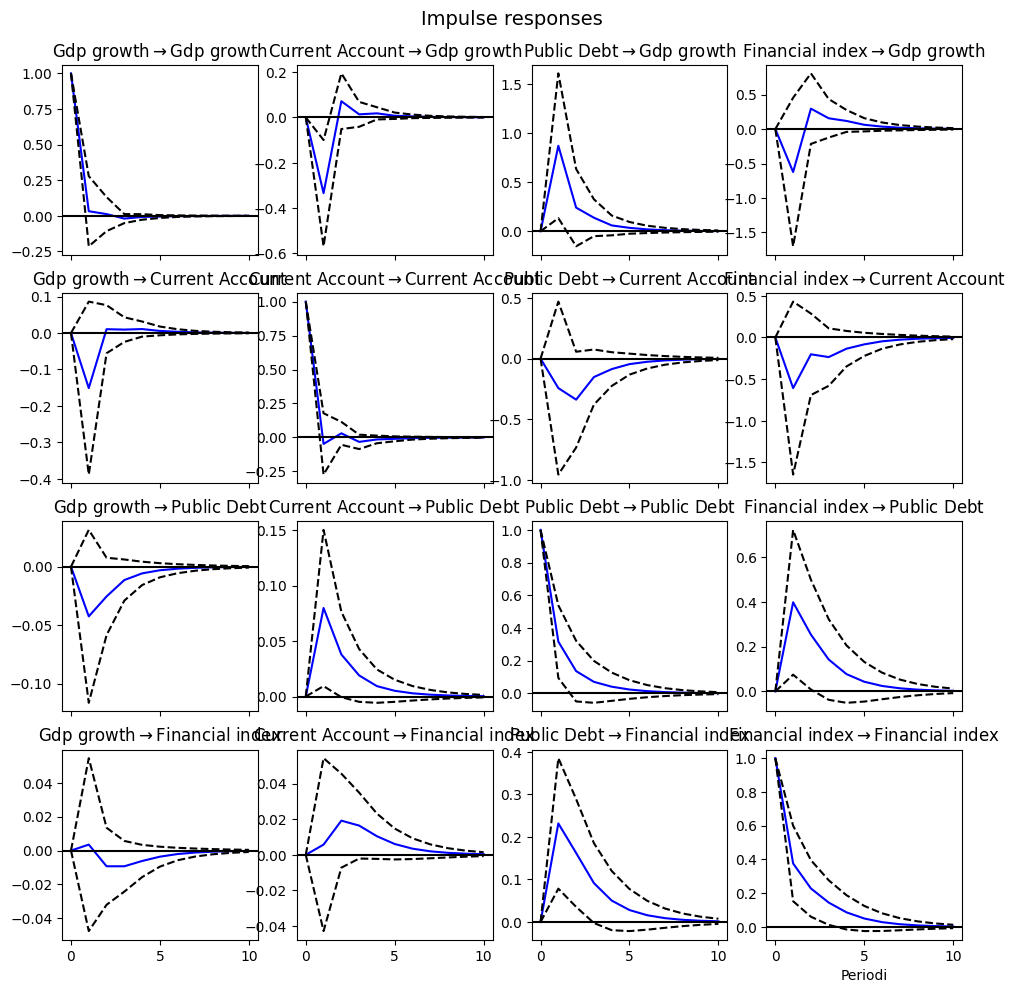

In [17]:
model = sm.tsa.VAR(usa)

# Stima il modello con un ordine di 6
results = model.fit(1)
irf = results.irf(10)

irf.plot(orth=False)
plt.xlabel('Periodi')

plt.show()

## Cholewsky

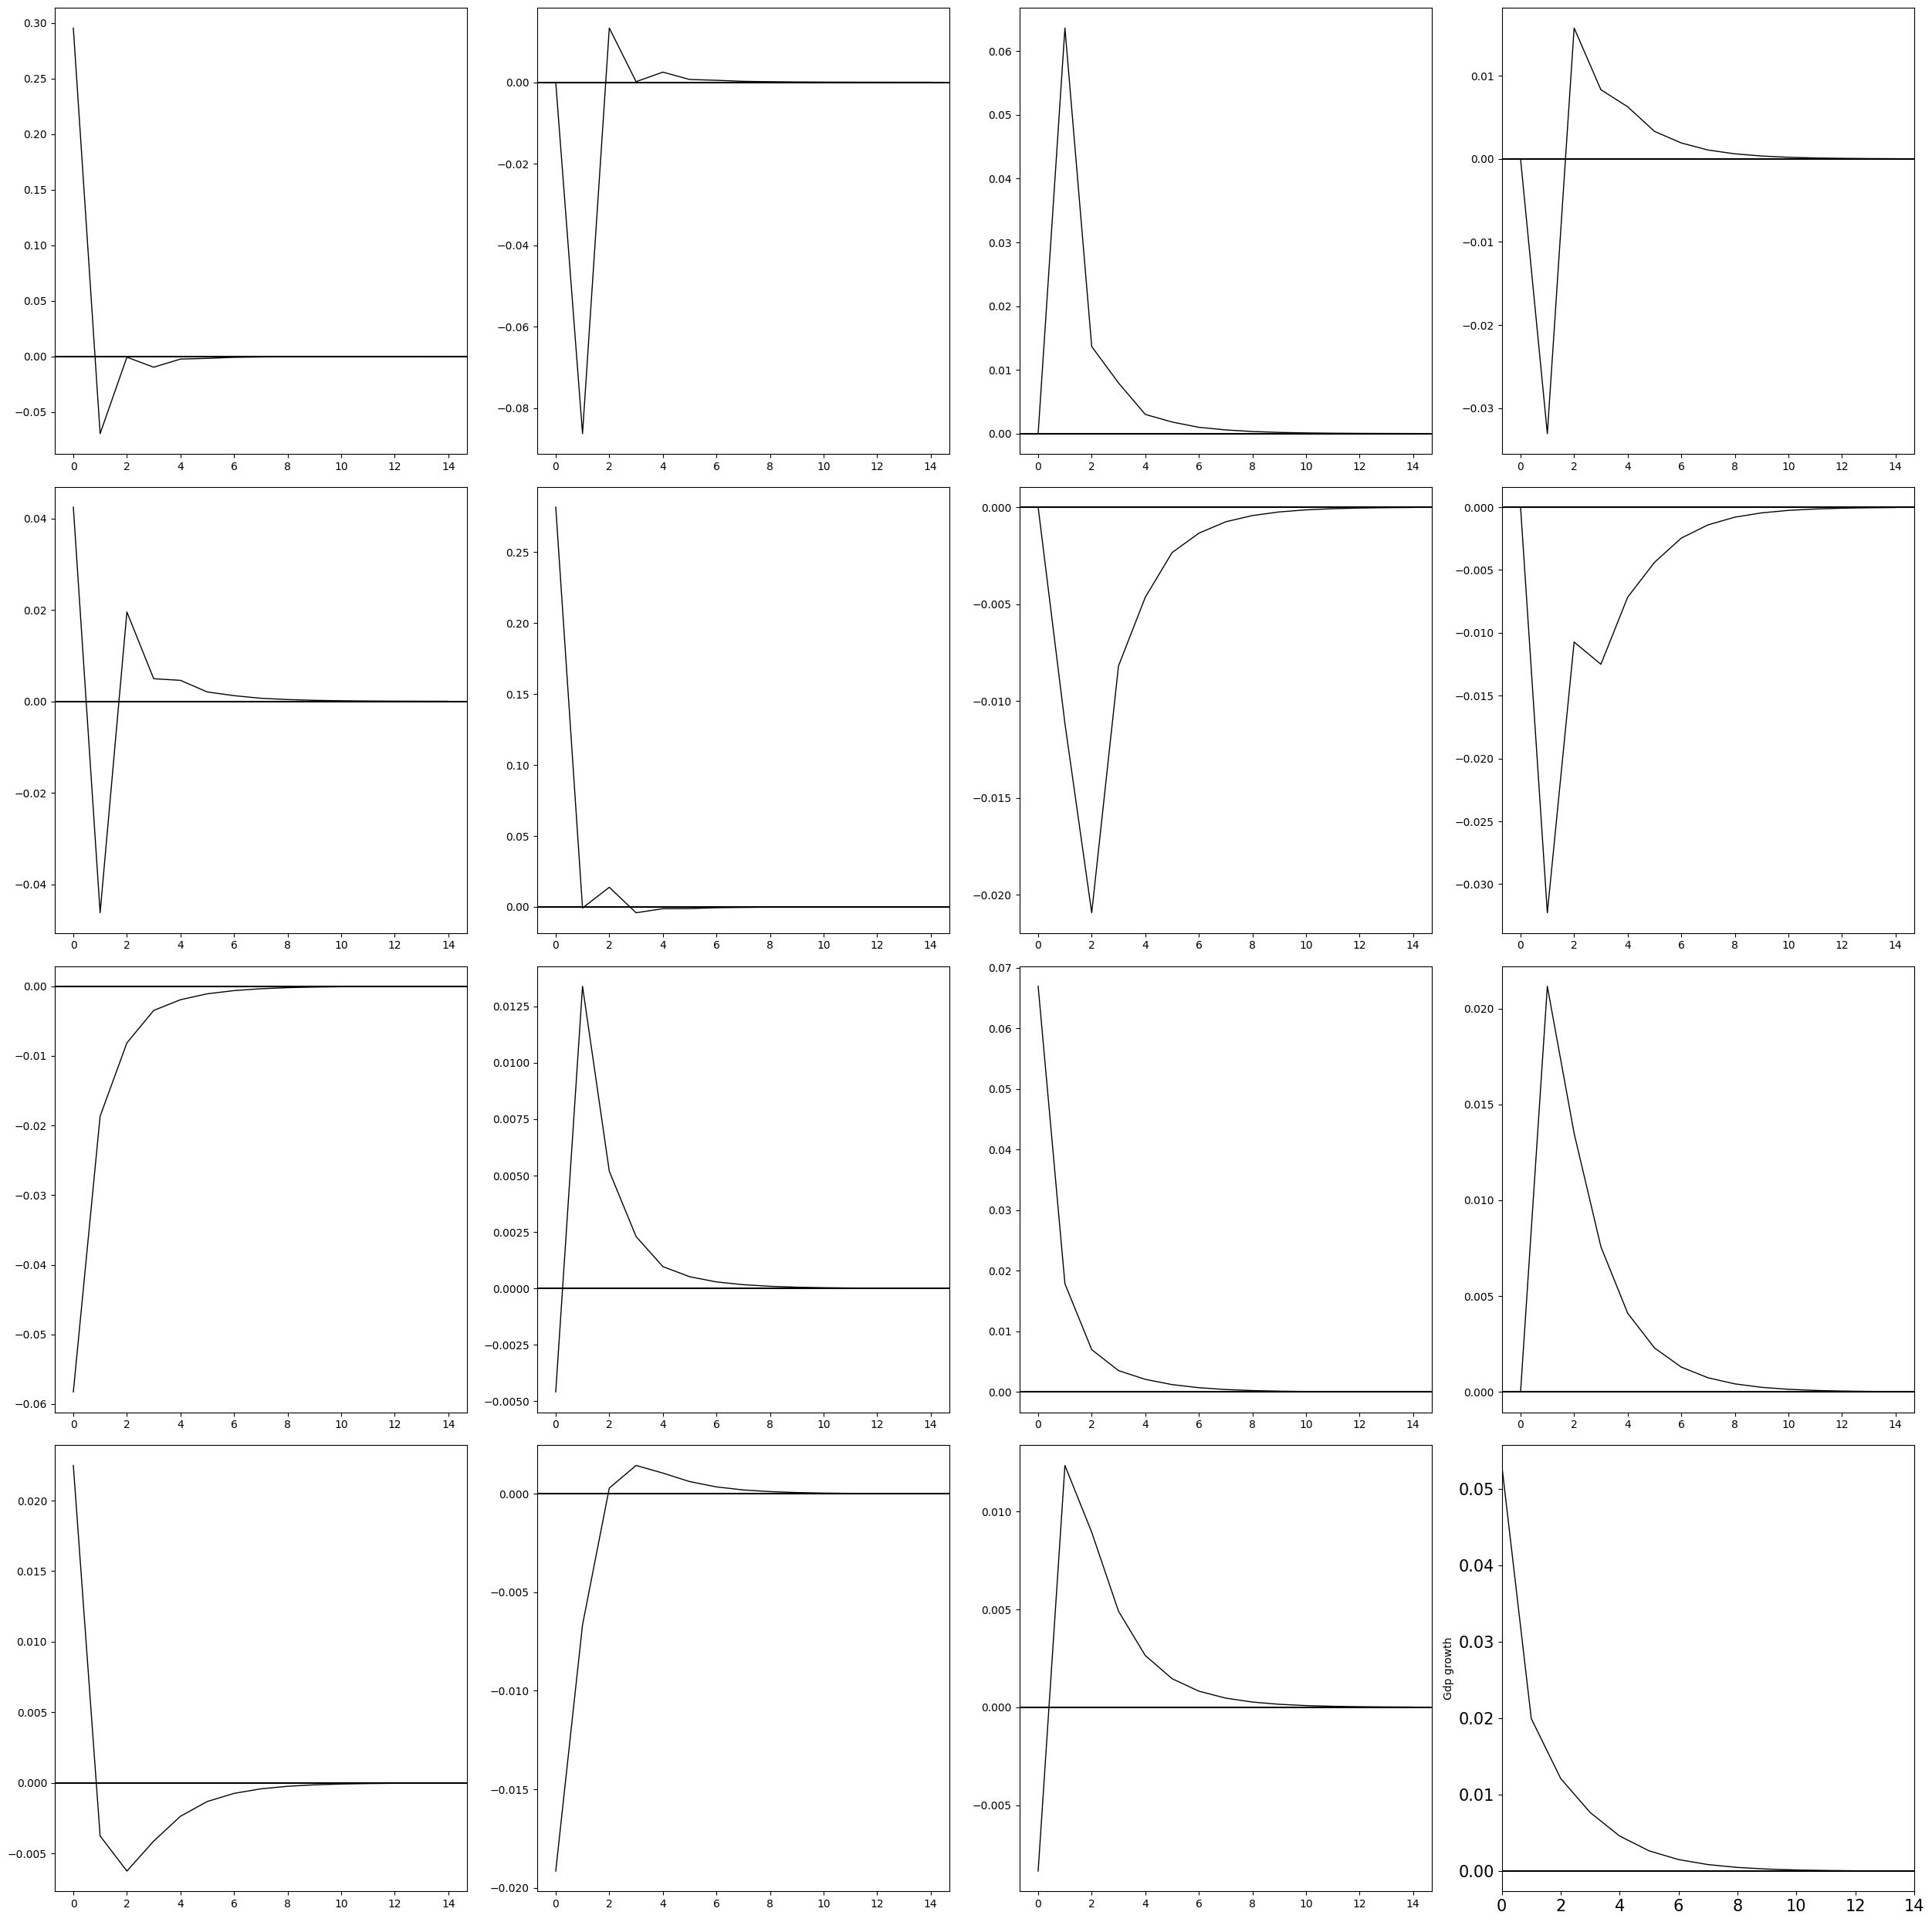

In [18]:


T = len(usa) - m * p - m

omega = np.dot(err.T, err) / T

P = np.linalg.cholesky(omega)
PHI_SR = np.zeros((m, m, h))

for i in range(h):
    PHI_SR[:, :, i] = np.dot(PHI[:, :, i], P)
    
PHI_SR_plot = np.reshape(np.transpose(PHI_SR, (2, 0, 1)), (h, m*m))

VARnames = ['Gdp growth', 'Current Account', 'Public Debt','Financil index'] 
Shocknames = ['Gdp shock', 'Commercial shock', 'Debt shock','Financial shock']
ylab = 0
# Create subplots
fig, axes = plt.subplots(m, m, figsize=(25, 25))
axes_flat = axes.flatten()
for k in range(m*m): 
    ax = axes_flat[k]
    ax.plot(np.arange(h), PHI_SR_plot[:, k], linewidth=1, color='k')
    ax.axhline(0, color='k', linestyle='-')
if k < 4: 
    ax.set_title(Shocknames[k]) 
if k in [0, 5, 10, 15]: 
    ax.set_ylabel(VARnames[ylab]) 
    ylab += 1

ax.set_xlim([0, h-1]) 
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout() 
plt.show()

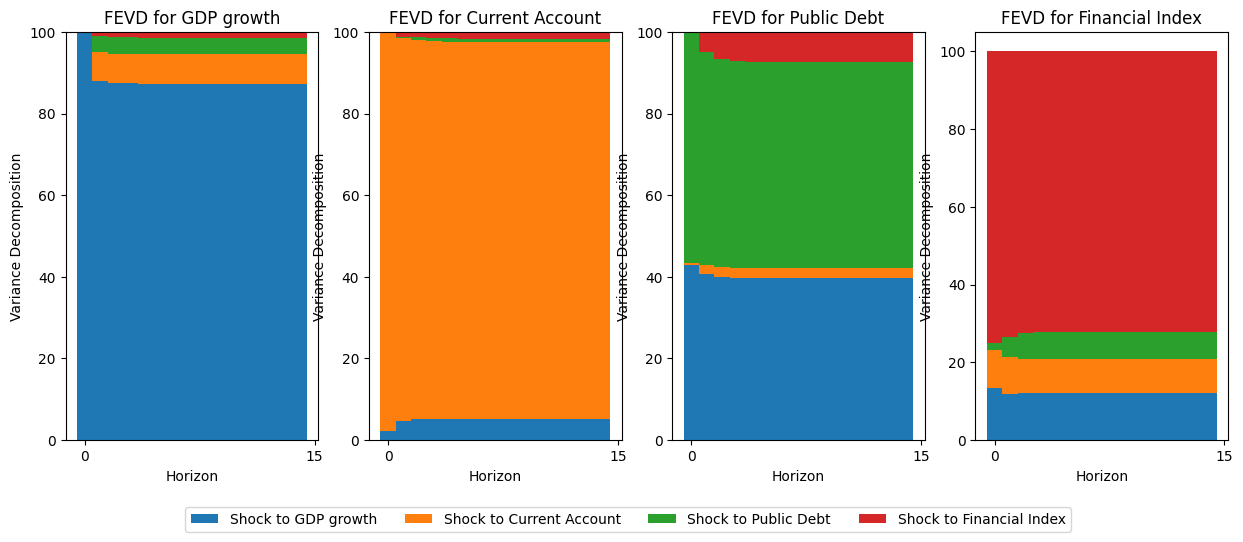

In [19]:

h = 15
MSE = np.zeros((m, m, h))
MSE_shock = np.zeros((m, m, h))
FEVD = np.zeros((h, m, m))

MSE[:, :, 0] = omega
for ii in range(m):
    for nn in range(1, h):
        MSE[:, :, nn] = MSE[:, :, nn - 1] + PHI[:, :, nn] @ omega @ PHI[:, :, nn].T
    MSE_shock[:, :, 0] = P[:, ii].reshape(-1, 1) @ P[:, ii].reshape(1, -1)

    for nn in range(1, h):
        MSE_shock[:, :, nn] = MSE_shock[:, :, nn - 1] + PHI[:, :, nn] @ MSE_shock[:, :, 0] @ PHI[:, :, nn].T
    FECD = MSE_shock[:, :, :] / MSE[:, :, :]

    for nn in range(h):
        for kk in range(m):
            FEVD[nn, ii, kk] = 100 * FECD[kk, kk, nn]

def plot_FEVD(FEVD_result, variable_names, horizon=40):
    """
    Plot FEVD results using stacked bar plots in subplots.
    FEVD_result: The FEVD matrix of shape (n, n, horizon)
    variable_names: List of names of the variables
    horizon: The number of periods ahead for the forecast
    """
    FEVD_result = FEVD_result.transpose((2, 1, 0))
    n = FEVD_result.shape[0]
    cols = 4
    rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(15, 6 * rows))
    fig.subplots_adjust(bottom=0.2, hspace=0.4)

    if rows == 1:
        axes = axes.flatten()
    for i in range(n):
        ax = axes[i // cols, i % cols] if rows > 1 else axes[i]
        bottom_values = np.zeros(horizon)
        for j in range(n):
            ax.bar(np.arange(horizon), FEVD_result[i, j, :], bottom=bottom_values, width=1, label=f"Shock to {variable_names[j]}")
            bottom_values += FEVD_result[i, j, :]
        ax.set_title(f"FEVD for {variable_names[i]}")
        ax.set_xlabel("Horizon")
        ax.set_ylabel("Variance Decomposition")
        ax.set_xticks(np.linspace(0, horizon, int(horizon / 10) + 1, endpoint=True))

    for i in range(n, rows * cols):
        ax = axes[i // cols, i % cols] if rows > 1 else axes[i]
        ax.axis('off')

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1), ncol=len(variable_names))

variable_names = ['GDP growth', 'Current Account', 'Public Debt', 'Financial Index']
plot_FEVD(FEVD, variable_names, h)


## TEST DI GRANGER CASUALITà CON FCI

In [20]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(usa[['Current Account', 'Financial index']], 6)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3846  , p=0.0692  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=3.5014  , p=0.0613  , df=1
likelihood ratio test: chi2=3.4350  , p=0.0638  , df=1
parameter F test:         F=3.3846  , p=0.0692  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6146  , p=0.2051  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=3.4213  , p=0.1807  , df=2
likelihood ratio test: chi2=3.3572  , p=0.1866  , df=2
parameter F test:         F=1.6146  , p=0.2051  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6253  , p=0.1899  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=5.2972  , p=0.1513  , df=3
likelihood ratio test: chi2=5.1439  , p=0.1616  , df=3
parameter F test:         F=1.6253  , p=0.1899  , df_denom=81, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.2488  , p=0.0713  , df_d

{1: ({'ssr_ftest': (3.3846425290894815, 0.06921679604086162, 87.0, 1),
   'ssr_chi2test': (3.501354340437395, 0.06131866429073739, 1),
   'lrtest': (3.4349625705541484, 0.06383003150473232, 1),
   'params_ftest': (3.3846425290895117, 0.06921679604086031, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.6145527991307171, 0.20509279178607084, 84.0, 2),
   'ssr_chi2test': (3.421314264824615, 0.18074697888496846, 2),
   'lrtest': (3.357191799673984, 0.18663584757345594, 2),
   'params_ftest': (1.6145527991307123, 0.20509279178607298, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.6252914754021852, 0.18994148682119963, 81.0, 3),
   'ssr_chi2test': (5.297246290199714, 0.15128117498557403, 3),
   'lrtest': (5.143932496123, 0.16155604115989813, 3),
   'params_ftest': (1.6252914754021897, 0.18994148682119877, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.

In [21]:
grangercausalitytests(usa[['Public Debt', 'Financial index']], 3)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4872  , p=0.1184  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=2.5729  , p=0.1087  , df=1
likelihood ratio test: chi2=2.5368  , p=0.1112  , df=1
parameter F test:         F=2.4872  , p=0.1184  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.6228  , p=0.0785  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=5.5579  , p=0.0621  , df=2
likelihood ratio test: chi2=5.3913  , p=0.0675  , df=2
parameter F test:         F=2.6228  , p=0.0785  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8532  , p=0.0423  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=9.2993  , p=0.0256  , df=3
likelihood ratio test: chi2=8.8400  , p=0.0315  , df=3
parameter F test:         F=2.8532  , p=0.0423  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (2.487157918136757, 0.11840824770602824, 87.0, 1),
   'ssr_chi2test': (2.5729219842794038, 0.10870677059183213, 1),
   'lrtest': (2.5368308444516288, 0.11121781599267483, 1),
   'params_ftest': (2.4871579181367407, 0.1184082477060286, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.6228338907566444, 0.0785362187101159, 84.0, 2),
   'ssr_chi2test': (5.557909911365271, 0.06210337425542843, 2),
   'lrtest': (5.391271153389312, 0.06749946704971128, 2),
   'params_ftest': (2.622833890756638, 0.07853621871011629, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.85318711033979, 0.04231273927474786, 81.0, 3),
   'ssr_chi2test': (9.29927650777413, 0.025565445666348524, 3),
   'lrtest': (8.84001703202938, 0.03149533310555268, 3),
   'params_ftest': (2.8531871103397872, 0.04231273927474786, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0

In [22]:
grangercausalitytests(usa[['Gdp growth', 'Financial index']], 3)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0037  , p=0.9518  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=0.0038  , p=0.9509  , df=1
likelihood ratio test: chi2=0.0038  , p=0.9509  , df=1
parameter F test:         F=0.0037  , p=0.9518  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3082  , p=0.2757  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=2.7722  , p=0.2500  , df=2
likelihood ratio test: chi2=2.7299  , p=0.2554  , df=2
parameter F test:         F=1.3082  , p=0.2757  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1517  , p=0.3334  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=3.7537  , p=0.2893  , df=3
likelihood ratio test: chi2=3.6758  , p=0.2987  , df=3
parameter F test:         F=1.1517  , p=0.3334  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (0.0036692926790449724, 0.9518368682860574, 87.0, 1),
   'ssr_chi2test': (0.0037958200128051438, 0.950873232824489, 1),
   'lrtest': (0.0037957399692061244, 0.9508737501476401, 1),
   'params_ftest': (0.0036692926790369185, 0.951836868286184, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.308228971439616, 0.2757480048213248, 84.0, 2),
   'ssr_chi2test': (2.7721994870982343, 0.25004865912750035, 2),
   'lrtest': (2.729900933666073, 0.2553933261150385, 2),
   'params_ftest': (1.3082289714396136, 0.2757480048213305, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.151688850932498, 0.3334126886413314, 81.0, 3),
   'ssr_chi2test': (3.753652551187401, 0.2893233380289526, 3),
   'lrtest': (3.6758023707934058, 0.2986666535874022, 3),
   'params_ftest': (1.1516888509324905, 0.33341268864133317, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.

## TEST GRANGER PER CURRENT ACCOUNT

In [23]:
grangercausalitytests(usa[['Financial index', 'Current Account']], 3)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1224  , p=0.7273  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=0.1267  , p=0.7219  , df=1
likelihood ratio test: chi2=0.1266  , p=0.7220  , df=1
parameter F test:         F=0.1224  , p=0.7273  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2379  , p=0.7888  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=0.5042  , p=0.7772  , df=2
likelihood ratio test: chi2=0.5027  , p=0.7777  , df=2
parameter F test:         F=0.2379  , p=0.7888  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2393  , p=0.8687  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=0.7799  , p=0.8543  , df=3
likelihood ratio test: chi2=0.7764  , p=0.8551  , df=3
parameter F test:         F=0.2393  , p=0.8687  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (0.12243111600375176, 0.7272581987203992, 87.0, 1),
   'ssr_chi2test': (0.12665287862457078, 0.7219280097150081, 1),
   'lrtest': (0.126563845744613, 0.7220217090789989, 1),
   'params_ftest': (0.12243111600377184, 0.7272581987203786, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.2379175159160298, 0.7887970749074428, 84.0, 2),
   'ssr_chi2test': (0.504158545631587, 0.7771831261321068, 2),
   'lrtest': (0.5027359612956843, 0.7777361270520848, 2),
   'params_ftest': (0.23791751591603227, 0.7887970749074428, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.23927265133227246, 0.8687162839491578, 81.0, 3),
   'ssr_chi2test': (0.7798516043422213, 0.8542799431759847, 3),
   'lrtest': (0.776416381624415, 0.8550992042817768, 3),
   'params_ftest': (0.23927265133226824, 0.8687162839491599, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.,

In [24]:
grangercausalitytests(usa[['Public Debt', 'Current Account']], 3)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9638  , p=0.1647  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=2.0315  , p=0.1541  , df=1
likelihood ratio test: chi2=2.0089  , p=0.1564  , df=1
parameter F test:         F=1.9638  , p=0.1647  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1218  , p=0.3305  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=2.3772  , p=0.3046  , df=2
likelihood ratio test: chi2=2.3460  , p=0.3094  , df=2
parameter F test:         F=1.1218  , p=0.3305  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6214  , p=0.1908  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=5.2845  , p=0.1521  , df=3
likelihood ratio test: chi2=5.1319  , p=0.1624  , df=3
parameter F test:         F=1.6214  , p=0.1908  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (1.9637617547013324, 0.16466884378459842, 87.0, 1),
   'ssr_chi2test': (2.0314776772772403, 0.15407074470977003, 1),
   'lrtest': (2.008889717879242, 0.15637972702724817, 1),
   'params_ftest': (1.9637617547013337, 0.16466884378459842, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.1218421692010894, 0.3305090518703914, 84.0, 2),
   'ssr_chi2test': (2.3772369775927844, 0.3046418395994015, 2),
   'lrtest': (2.346042609930805, 0.3094306432179456, 2),
   'params_ftest': (1.1218421692010816, 0.3305090518703935, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.6213658358245406, 0.19084249082245267, 81.0, 3),
   'ssr_chi2test': (5.284451613057762, 0.15211449010354458, 3),
   'lrtest': (5.131863449663342, 0.16239221344977894, 3),
   'params_ftest': (1.6213658358245393, 0.19084249082245267, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.

In [25]:
grangercausalitytests(usa[['Gdp growth', 'Current Account']], 3)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.1231  , p=0.0091  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=7.3687  , p=0.0066  , df=1
likelihood ratio test: chi2=7.0826  , p=0.0078  , df=1
parameter F test:         F=7.1231  , p=0.0091  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.0693  , p=0.0083  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=10.7420 , p=0.0046  , df=2
likelihood ratio test: chi2=10.1416 , p=0.0063  , df=2
parameter F test:         F=5.0693  , p=0.0083  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.5852  , p=0.0173  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=11.6850 , p=0.0085  , df=3
likelihood ratio test: chi2=10.9717 , p=0.0119  , df=3
parameter F test:         F=3.5852  , p=0.0173  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (7.123080444355247, 0.00907755534823478, 87.0, 1),
   'ssr_chi2test': (7.3687039079537024, 0.00663687524126617, 1),
   'lrtest': (7.082565621484605, 0.007783748693463635, 1),
   'params_ftest': (7.1230804443552955, 0.009077555348234567, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (5.069273400250643, 0.008346327826189957, 84.0, 2),
   'ssr_chi2test': (10.742031729102553, 0.004649405743942227, 2),
   'lrtest': (10.141621238452501, 0.006277329553790208, 2),
   'params_ftest': (5.069273400250633, 0.008346327826190046, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.5851600203743423, 0.017251574267249176, 81.0, 3),
   'ssr_chi2test': (11.684965992331188, 0.00854406438306708, 3),
   'lrtest': (10.971669162538518, 0.011880061697430722, 3),
   'params_ftest': (3.585160020374337, 0.017251574267249273, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.

## TEST SUL DEBITO

In [26]:
grangercausalitytests(usa[['Financial index', 'Public Debt']], 3)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.1368 , p=0.0012  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=11.5208 , p=0.0007  , df=1
likelihood ratio test: chi2=10.8409 , p=0.0010  , df=1
parameter F test:         F=11.1368 , p=0.0012  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.9605  , p=0.0227  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=8.3925  , p=0.0151  , df=2
likelihood ratio test: chi2=8.0201  , p=0.0181  , df=2
parameter F test:         F=3.9605  , p=0.0227  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.7001  , p=0.0045  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=15.3190 , p=0.0016  , df=3
likelihood ratio test: chi2=14.1226 , p=0.0027  , df=3
parameter F test:         F=4.7001  , p=0.0045  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (11.13677641448736, 0.0012465417910141028, 87.0, 1),
   'ssr_chi2test': (11.520803187400716, 0.000688216476948284, 1),
   'lrtest': (10.840865819579335, 0.0009928429779570826, 1),
   'params_ftest': (11.136776414487365, 0.0012465417910140953, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.9605255777117314, 0.02271437380803181, 84.0, 2),
   'ssr_chi2test': (8.39254229562724, 0.015051597491380502, 2),
   'lrtest': (8.020081045858433, 0.018132660433397736, 2),
   'params_ftest': (3.960525577711719, 0.02271437380803216, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (4.700142885228382, 0.004470948808148457, 81.0, 3),
   'ssr_chi2test': (15.318984218522132, 0.001563382784575886, 3),
   'lrtest': (14.12262036144972, 0.002742908700714824, 3),
   'params_ftest': (4.700142885228379, 0.004470948808148478, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0

In [27]:
grangercausalitytests(usa[['Current Account', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0570  , p=0.8119  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=0.0589  , p=0.8082  , df=1
likelihood ratio test: chi2=0.0589  , p=0.8082  , df=1
parameter F test:         F=0.0570  , p=0.8119  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0521  , p=0.9493  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=0.1104  , p=0.9463  , df=2
likelihood ratio test: chi2=0.1103  , p=0.9463  , df=2
parameter F test:         F=0.0521  , p=0.9493  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0759  , p=0.9728  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=0.2473  , p=0.9696  , df=3
likelihood ratio test: chi2=0.2469  , p=0.9697  , df=3
parameter F test:         F=0.0759  , p=0.9728  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (0.05695456551720297, 0.8119370305730755, 87.0, 1),
   'ssr_chi2test': (0.05891851605227893, 0.8082135074001928, 1),
   'lrtest': (0.05889923895648508, 0.8082442732842406, 1),
   'params_ftest': (0.056954565517225185, 0.8119370305730286, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.05207889911259581, 0.9492845935085694, 84.0, 2),
   'ssr_chi2test': (0.11035766716716731, 0.9463158997567485, 2),
   'lrtest': (0.11028930336686926, 0.9463482471851885, 2),
   'params_ftest': (0.05207889911258945, 0.9492845935085783, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.07586907543404652, 0.9728311211285418, 81.0, 3),
   'ssr_chi2test': (0.2472769865998553, 0.9696187611631892, 3),
   'lrtest': (0.24693021612435473, 0.9696795374047089, 3),
   'params_ftest': (0.07586907543405096, 0.9728311211285386, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.

In [28]:
grangercausalitytests(usa[['Gdp growth', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6670  , p=0.0195  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=5.8624  , p=0.0155  , df=1
likelihood ratio test: chi2=5.6794  , p=0.0172  , df=1
parameter F test:         F=5.6670  , p=0.0195  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5211  , p=0.0864  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=5.3423  , p=0.0692  , df=2
likelihood ratio test: chi2=5.1881  , p=0.0747  , df=2
parameter F test:         F=2.5211  , p=0.0864  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1355  , p=0.1021  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=6.9600  , p=0.0732  , df=3
likelihood ratio test: chi2=6.6985  , p=0.0822  , df=3
parameter F test:         F=2.1355  , p=0.1021  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (5.666978287386824, 0.019470469620618033, 87.0, 1),
   'ssr_chi2test': (5.862391331779473, 0.015467765215483952, 1),
   'lrtest': (5.679366225823458, 0.017165567262893602, 1),
   'params_ftest': (5.66697828738683, 0.019470469620618033, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.5210953812188808, 0.08643803267743252, 84.0, 2),
   'ssr_chi2test': (5.342321164963819, 0.06917189901148207, 2),
   'lrtest': (5.188122574363092, 0.07471598001373674, 2),
   'params_ftest': (2.521095381218883, 0.0864380326774321, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.1354590143925356, 0.1021288026061399, 81.0, 3),
   'ssr_chi2test': (6.960014565427523, 0.0731832234561917, 3),
   'lrtest': (6.698479850309894, 0.08215515151093104, 3),
   'params_ftest': (2.1354590143925303, 0.10212880260614011, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.,